In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import default_rng

In [29]:
rng = default_rng(65537)

In [30]:
bat_path = 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv'
bat = pd.read_csv(bat_path, index_col=0)

pitch_path = 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Pitching.csv'
pitch = pd.read_csv(pitch_path, index_col=0)

fielding_path = 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Fielding.csv'
field = pd.read_csv(pitch_path, index_col=0)

min_year = 1980

bat = bat[bat.yearID >= min_year]
pitch = pitch[pitch.yearID >= min_year]
field = field[field.yearID >= min_year]

In [31]:
# adding stats
bat['PA'] = bat['AB'] + bat['BB'] + bat['HBP']
bat['OBP'] = (bat['H'] + bat['BB']+bat['HBP']) / bat['PA']
# modified TB to include walks
bat['TB'] = bat['H'] + bat['2B'] + 2*bat['3B'] + 3*bat['HR'] 
bat['SLG'] = bat['TB']/bat['AB']
bat['OPS'] = bat['SLG'] + bat['OBP']
bat['hit_rate'] = bat['H'] / bat['PA']
bat['sing_rate'] = (bat['H']-bat['2B']- bat['3B']-bat['HR'])/bat['PA']
bat['doub_rate'] = bat['2B']/bat['PA']
bat['trip_rate'] = bat['3B']/bat['PA']
bat['dong_rate'] = bat['HR']/bat['PA']
bat['walk_rate'] = bat['BB']/bat['PA']
bat['hbp_rate'] = bat['HBP']/bat['PA']
bat['sing_sq'] = bat['sing_rate']**2
bat['doub_sq'] = bat['doub_rate']**2
bat['trip_sq'] = bat['trip_rate']**2
bat['dong_sq'] = bat['dong_rate']**2
bat['walk_sq'] = bat['walk_rate']**2
bat['hbp_sq'] = bat['hbp_rate']**2
bat['run_rate'] = (bat['R'] + bat['RBI'] - bat['HR'])/bat['PA']
col = bat.pop('PA')
bat.insert(5, col.name, col)
bat.head()

bat = bat[bat['PA'] > 199]
bat.head(10)

,yearID,stint,teamID,lgID,G,PA,AB,R,H,2B,...,dong_rate,walk_rate,hbp_rate,sing_sq,doub_sq,trip_sq,dong_sq,walk_sq,hbp_sq,run_rate
playerID,,,,,,,,,,,,,,,,,,,,,
adamsgl01,1980,1,MIN,AL,99,277.0,262,32,75,11,...,0.021661,0.054152,0.000000,0.040871,0.001577,0.000052,0.000469,0.002932,0.000000,0.231047
aikenwi01,1980,1,KCA,AL,151,614.0,543,70,151,24,...,0.032573,0.104235,0.011401,0.030369,0.001528,0.000000,0.001061,0.010865,0.000130,0.241042
anderji01,1980,1,SEA,AL,116,347.0,317,46,72,7,...,0.023055,0.077810,0.008646,0.026983,0.000407,0.000000,0.000532,0.006054,0.000075,0.195965
armasto01,1980,1,OAK,AL,158,659.0,628,87,175,18,...,0.053111,0.044006,0.003035,0.029925,0.000746,0.000147,0.002821,0.001937,0.000009,0.244310
ashbyal01,1980,1,HOU,NL,116,387.0,352,30,90,19,...,0.007752,0.090439,0.000000,0.029085,0.002410,0.000027,0.000060,0.008179,0.000000,0.193798
asselbr01,1980,1,ATL,NL,87,230.0,218,18,62,13,...,0.013043,0.047826,0.004348,0.038280,0.003195,0.000019,0.000170,0.002287,0.000019,0.173913
bailobo01,1980,1,TOR,AL,117,385.0,347,44,82,14,...,0.002597,0.093506,0.005195,0.028504,0.001322,0.000027,0.000007,0.008743,0.000027,0.153247
baineha01,1980,1,CHA,AL,141,511.0,491,55,125,23,...,0.025440,0.037182,0.001957,0.026382,0.002026,0.000138,0.000647,0.001383,0.000004,0.178082
bakerdu01,1980,1,LAN,NL,153,625.0,579,80,170,26,...,0.046400,0.068800,0.004800,0.031542,0.001731,0.000041,0.002153,0.004733,0.000023,0.236800


In [32]:
sns.set_theme()

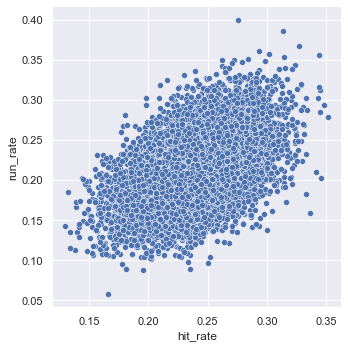

In [33]:
sns.relplot(x=bat.hit_rate, y=bat.run_rate)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [55]:
X = bat[['sing_rate', 'sing_sq', 'doub_rate', 'doub_sq', 'trip_rate', 'trip_sq', 'dong_rate', 'dong_sq', 'walk_rate', 'walk_sq', 'hbp_rate', 'hbp_sq']]
y = bat['run_rate']
display(X)
model = LinearRegression()
#model = Ridge(0.05)
#model = Lasso(0.01)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=65537)

model.fit(X_train, y_train)

,sing_rate,sing_sq,doub_rate,doub_sq,trip_rate,trip_sq,dong_rate,dong_sq,walk_rate,walk_sq,hbp_rate,hbp_sq
playerID,,,,,,,,,,,,
adamsgl01,0.202166,0.040871,0.039711,0.001577,0.007220,0.000052,0.021661,0.000469,0.054152,0.002932,0.000000,0.000000
aikenwi01,0.174267,0.030369,0.039088,0.001528,0.000000,0.000000,0.032573,0.001061,0.104235,0.010865,0.011401,0.000130
anderji01,0.164265,0.026983,0.020173,0.000407,0.000000,0.000000,0.023055,0.000532,0.077810,0.006054,0.008646,0.000075
armasto01,0.172989,0.029925,0.027314,0.000746,0.012140,0.000147,0.053111,0.002821,0.044006,0.001937,0.003035,0.000009
ashbyal01,0.170543,0.029085,0.049096,0.002410,0.005168,0.000027,0.007752,0.000060,0.090439,0.008179,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
yastrmi01,0.092803,0.008612,0.053030,0.002812,0.005682,0.000032,0.047348,0.002242,0.096591,0.009330,0.017045,0.000291
yelicch01,0.146186,0.021370,0.040254,0.001620,0.004237,0.000018,0.019068,0.000364,0.148305,0.021994,0.006356,0.000040
zimmebr01,0.145349,0.021126,0.026163,0.000684,0.002907,0.000008,0.023256,0.000541,0.087209,0.007605,0.043605,0.001901


LinearRegression()

In [56]:
y_pred = model.predict(X_test)

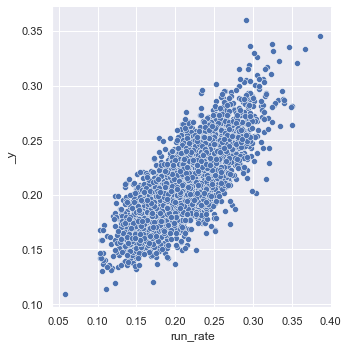

In [57]:
sns.relplot(x=y_test, y=y_pred)

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
from sklearn.metrics import r2_score

In [60]:
# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred)**.5)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [  0.75771184  -0.52840062   0.85516703   1.04172189   2.16488619
 -26.16911184   1.61974578   1.5916669    0.35513039  -0.19548827
   0.24927005  -0.57570266]
Mean squared error: 0.02
Coefficient of determination: 0.61


In [75]:
data = bat[['sing_rate', 'doub_rate', 'trip_rate', 'dong_rate', 'walk_rate', 'hbp_rate', 'run_rate']]
data.reset_index(inplace=True)

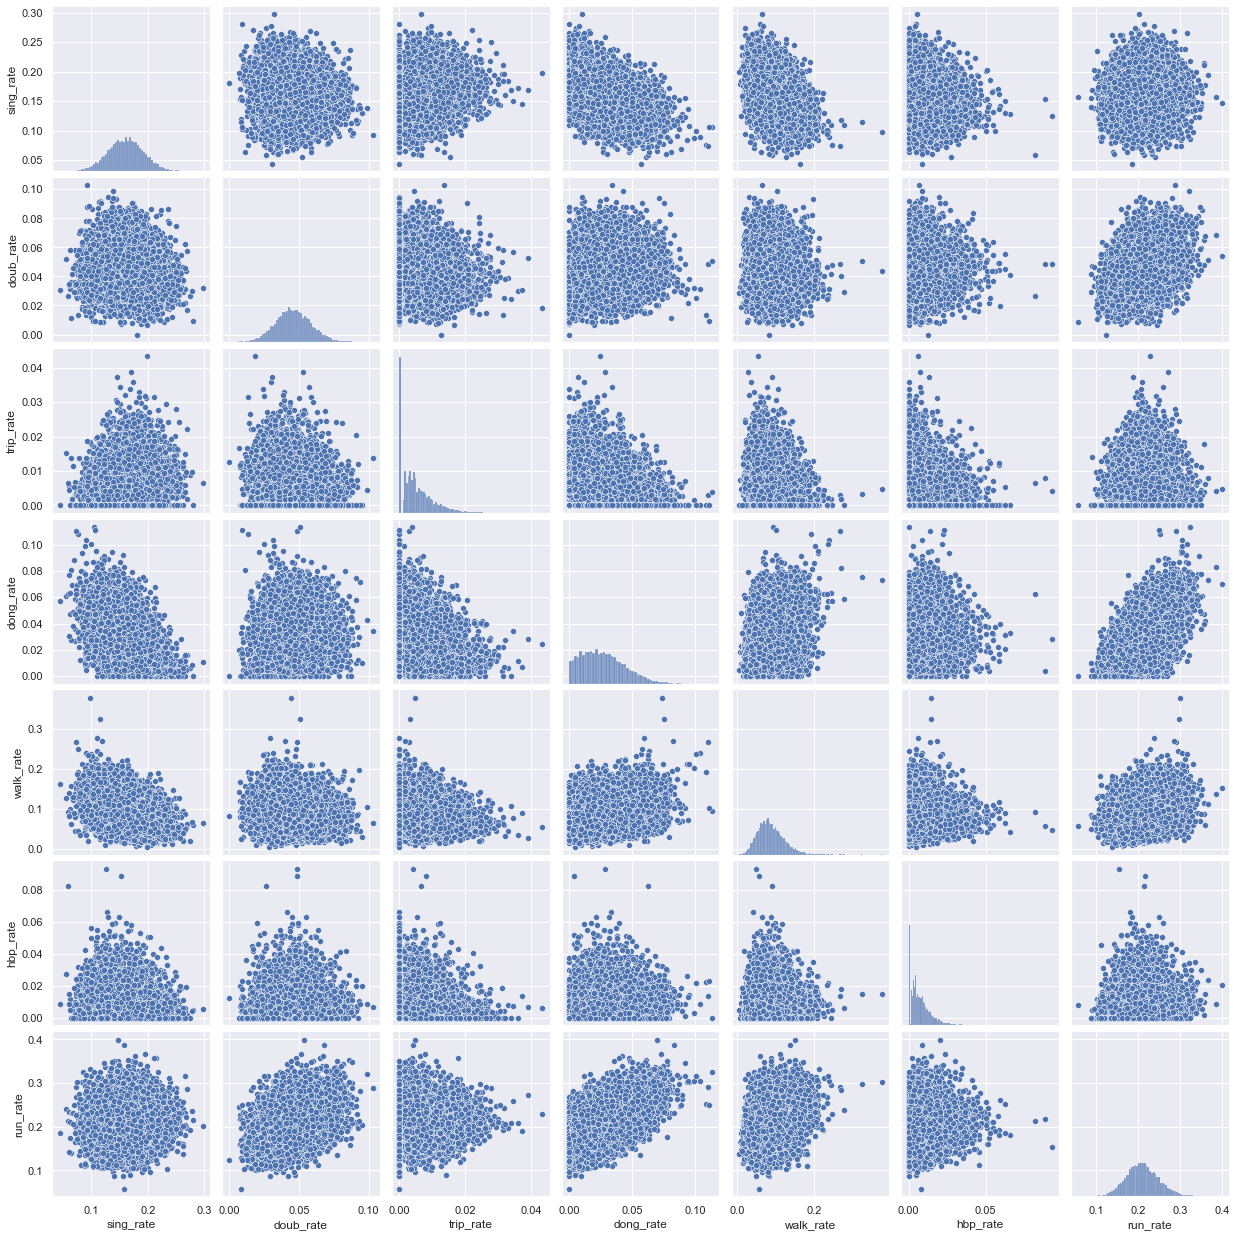

In [76]:
sns.pairplot(data)